# Q2. Train a **single perceptron and SVM** to learn the two classes in the following table.

$x_{1}$ |$x_{2}$ | $\omega$
--------|--------|---------
2       |2       |1
-1      |-3      |0 
-1      |2       |1
0       |-1      |0 
1       |3       |1
-1      |-2      |0 
1       |-2      |0
-1      |-1      |1 

# where $x_{1}$ and $x_{2}$ are the inputs and $\omega$ is the target class. Assume that all the weights of the perceptron are initialized as 0 with learning rate 0.01 and 0.5 separately. Also, tabulate the number of iterations required to converge the perception algorithm with these two learning rates.

### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import matrix, solvers

## Single Perceptron

### Defining the necessary functions used

In [ ]:
def decision_plot(w, x_min, x_max, y_min, y_max):
    inp_0 = []
    inp_1 = []

    x_min = x_min - np.abs(((x_max - x_min) / 10))
    y_min = y_min - np.abs(((y_max - y_min) / 10))

    x_max = x_max + np.abs(((x_max - x_min) / 10))
    y_max = y_max + np.abs(((y_max - y_min) / 10))

    for i in np.arange(x_min, x_max, np.abs(x_max - x_min) / 100):
        for j in np.arange(y_min, y_max, np.abs(x_max - x_min) / 100):
            y_pred = np.dot(np.array([[1, i, j]]), w)
            
            if y_pred < 0:
                inp_0.append(np.array((i, j)))
            
            else:
                inp_1.append(np.array((i, j)))

    return inp_0, inp_1

In [ ]:
def perceptron_training_alg(X, Y, learning_rate):
  # Adding Bias to the input and Randomly initializing weights
  num_samples, num_features = X.shape
  
  X = np.hstack((np.ones((num_samples, 1)), X))
  W = np.zeros(num_features + 1).reshape((-1, 1))

  weight_vector = []
  weight_vector.append(W)

  print(W, "\n")
  
  # Running the algorithm until all the data points are correctly classified
  samples_misclassified = True
  cnt=0
  while samples_misclassified and cnt < 100000:
    # Initially we'll assume that there are no misclassified samples
    samples_misclassified = False
    
    for index, x in enumerate(X):
      if cnt >= 100000:
        return W, np.array(weight_vector)
      
      x = Y[index] * x
      
      if np.dot(x.reshape((1, -1)), W) <= 0: # if samples misclassified
        samples_misclassified = True
        W = W + (learning_rate * x.reshape((-1, 1)))     # Gradient Descent Step
        weight_vector.append(W)

        print(W, "\n")
        cnt += 1
  
  return W, np.array(weight_vector)

In [ ]:
def sorter(X, Y):
  X_new0 = []
  Y_new0 = []
  
  X_new1 = []
  Y_new1 = []
  
  for x, y in zip(X, Y):
    if y == 0:
      Y_new0.append(y)
      X_new0.append(x)
    
    else:
      Y_new1.append(y)
      X_new1.append(x)
  
  X0 = []
  Y0 = []
  
  X1 = []
  Y1 = []

  if len(X_new0) > 0:
    X0 = np.stack(X_new0)
    Y0 = np.stack(Y_new0)
  
  elif len(X_new1) > 0:
    X1 = np.stack(X_new1)
    Y1 = np.stack(Y_new1)
  
  if len(X0) > 0 and len(X1) > 0:
    X = np.concatenate((X0, X1))
    Y = np.concatenate((Y0, Y1))
  
  elif len(X0) > 0:
    X = X0
    Y = Y0
  
  else:
    X = X1
    Y = Y1
  
  return X, Y

In [ ]:
def decision_boundary(W, X, Y):
  X, Y = sorter(X, Y)
  num_samples, num_features = X.shape
  np2 = np.hstack((np.ones((num_samples, 1)), X))
  
  X=np2
  
  x1, y1 = decision_plot(W, min(X[:,1]), max(X[:,1]), min(X[:,2]), max(X[:,2]))
  
  plt.scatter([i[0] for i in x1], [i[1] for i in x1])
  plt.scatter([i[0] for i in y1], [i[1] for i in y1])
  plt.scatter(X[:np.argmax(Y), 1], X[:np.argmax(Y), 2])
  plt.scatter(X[np.argmax(Y):, 1], X[np.argmax(Y):, 2])
  plt.show()

### Code

In [ ]:
X = np.array([[2, 2], [-1, -3], [-1, 2], [0, -1], [1, 3], [-1, -2], [1, -2], [-1, -1]])
Y = [[1], [-1], [1], [-1], [1], [-1], [-1], [1]]
ans = [[1], [0], [1], [0], [1], [0], [0], [1]]

len(X)

8

#### Learning Rate = 0.01

In [ ]:
W1, weight_vector1 = perceptron_training_alg(X, Y, 0.01)

[[0.]
 [0.]
 [0.]] 

[[0.01]
 [0.02]
 [0.02]] 

[[0.02]
 [0.01]
 [0.01]] 

[[0.01]
 [0.01]
 [0.02]] 

[[0.02]
 [0.  ]
 [0.01]] 

[[0.01]
 [0.  ]
 [0.02]] 

[[ 0.02]
 [-0.01]
 [ 0.01]] 

[[ 0.01]
 [-0.01]
 [ 0.02]] 

[[ 0.02]
 [-0.02]
 [ 0.01]] 

[[0.03]
 [0.  ]
 [0.03]] 

[[0.02]
 [0.  ]
 [0.04]] 

[[ 0.03]
 [-0.01]
 [ 0.03]] 

[[ 0.02]
 [-0.01]
 [ 0.04]] 

[[ 0.03]
 [-0.02]
 [ 0.03]] 

[[ 0.02]
 [-0.02]
 [ 0.04]] 

[[ 0.03]
 [-0.03]
 [ 0.03]] 

[[ 0.02]
 [-0.03]
 [ 0.04]] 



In [ ]:
W1

array([[ 0.02],
       [-0.03],
       [ 0.04]])

In [ ]:
weight_vector1

array([[[ 0.  ],
        [ 0.  ],
        [ 0.  ]],

       [[ 0.01],
        [ 0.02],
        [ 0.02]],

       [[ 0.02],
        [ 0.01],
        [ 0.01]],

       [[ 0.01],
        [ 0.01],
        [ 0.02]],

       [[ 0.02],
        [ 0.  ],
        [ 0.01]],

       [[ 0.01],
        [ 0.  ],
        [ 0.02]],

       [[ 0.02],
        [-0.01],
        [ 0.01]],

       [[ 0.01],
        [-0.01],
        [ 0.02]],

       [[ 0.02],
        [-0.02],
        [ 0.01]],

       [[ 0.03],
        [ 0.  ],
        [ 0.03]],

       [[ 0.02],
        [ 0.  ],
        [ 0.04]],

       [[ 0.03],
        [-0.01],
        [ 0.03]],

       [[ 0.02],
        [-0.01],
        [ 0.04]],

       [[ 0.03],
        [-0.02],
        [ 0.03]],

       [[ 0.02],
        [-0.02],
        [ 0.04]],

       [[ 0.03],
        [-0.03],
        [ 0.03]],

       [[ 0.02],
        [-0.03],
        [ 0.04]]])

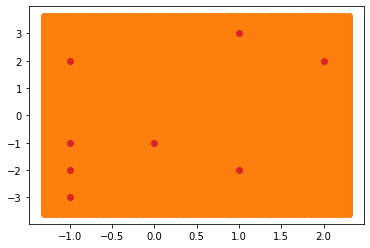

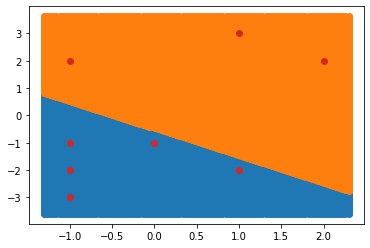

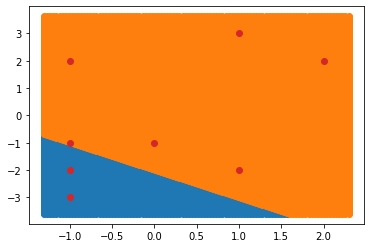

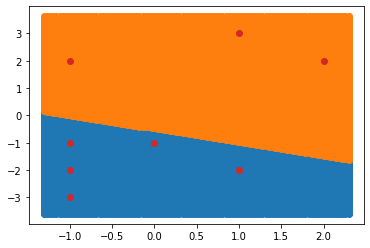

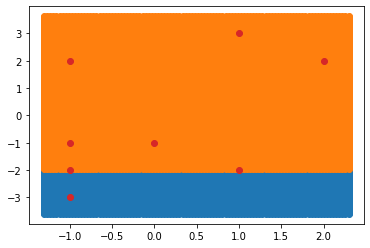

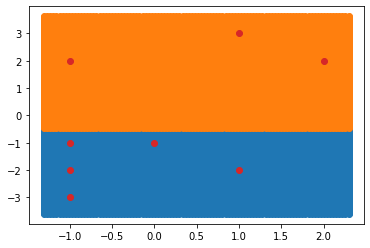

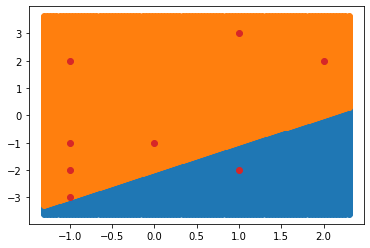

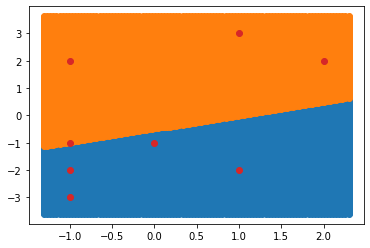

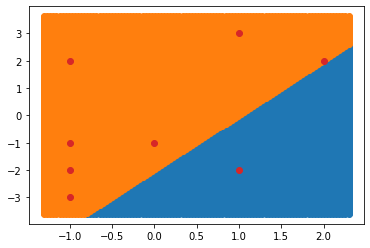

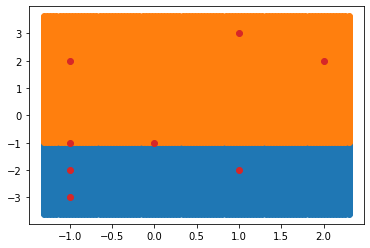

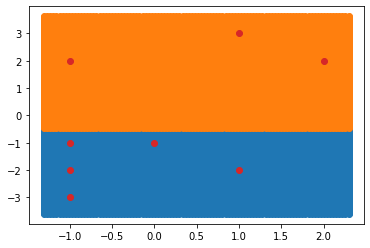

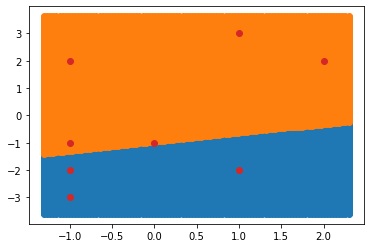

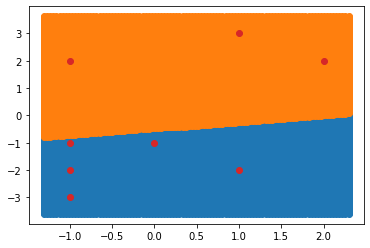

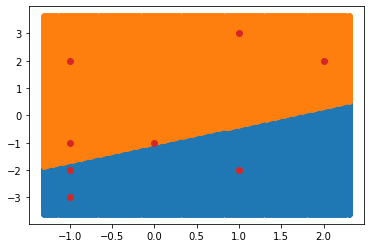

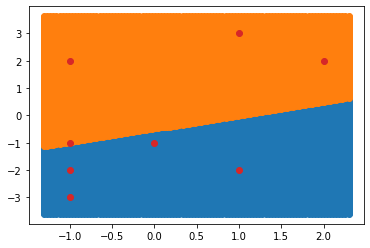

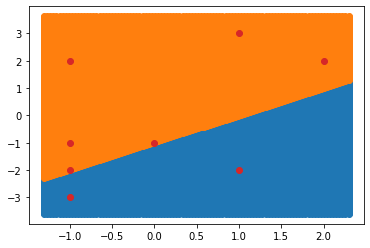

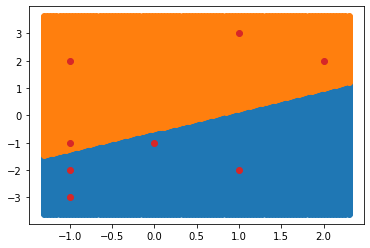

In [ ]:
for w in weight_vector1:
  decision_boundary(w, X, ans)

#### Learning Rate = 0.5

In [ ]:
W2, weight_vector2 = perceptron_training_alg(X,Y,0.5)

[[0.]
 [0.]
 [0.]] 

[[0.5]
 [1. ]
 [1. ]] 

[[1. ]
 [0.5]
 [0.5]] 

[[0.5]
 [0.5]
 [1. ]] 

[[1. ]
 [0. ]
 [0.5]] 

[[0.5]
 [0. ]
 [1. ]] 

[[ 1. ]
 [-0.5]
 [ 0.5]] 

[[0.5]
 [0. ]
 [2. ]] 

[[ 1. ]
 [-0.5]
 [ 1.5]] 

[[ 1.5]
 [-1. ]
 [ 1. ]] 

[[ 1. ]
 [-1. ]
 [ 1.5]] 



In [ ]:
W2

array([[ 1. ],
       [-1. ],
       [ 1.5]])

In [ ]:
weight_vector2

array([[[ 0. ],
        [ 0. ],
        [ 0. ]],

       [[ 0.5],
        [ 1. ],
        [ 1. ]],

       [[ 1. ],
        [ 0.5],
        [ 0.5]],

       [[ 0.5],
        [ 0.5],
        [ 1. ]],

       [[ 1. ],
        [ 0. ],
        [ 0.5]],

       [[ 0.5],
        [ 0. ],
        [ 1. ]],

       [[ 1. ],
        [-0.5],
        [ 0.5]],

       [[ 0.5],
        [ 0. ],
        [ 2. ]],

       [[ 1. ],
        [-0.5],
        [ 1.5]],

       [[ 1.5],
        [-1. ],
        [ 1. ]],

       [[ 1. ],
        [-1. ],
        [ 1.5]]])

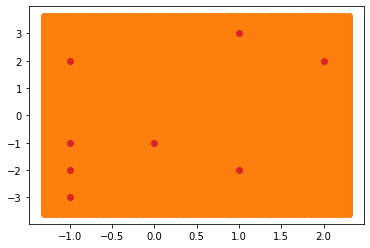

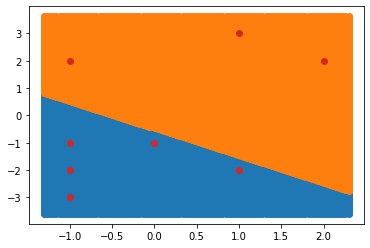

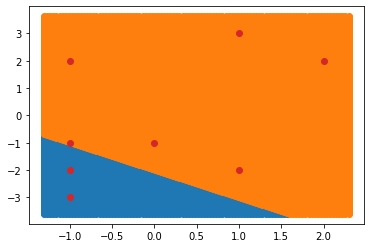

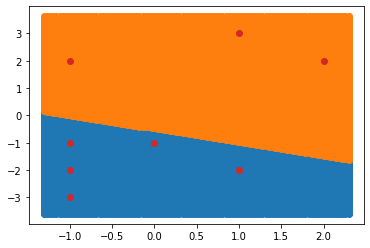

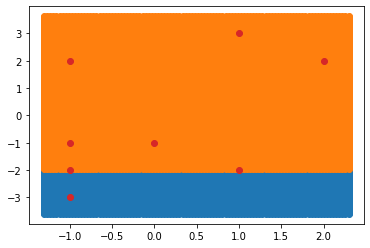

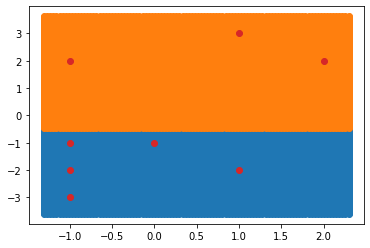

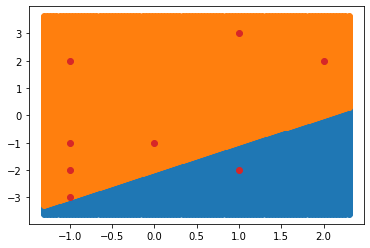

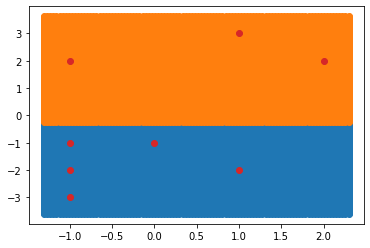

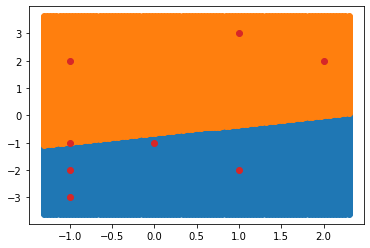

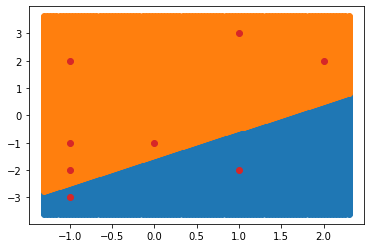

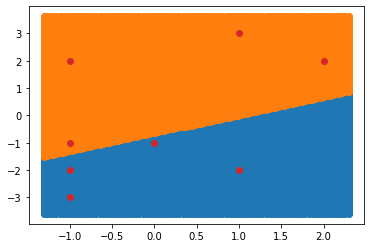

In [ ]:
for w in weight_vector2:
  decision_boundary(w, X, ans)

## SVM

### Defining the necessary functions used

In [ ]:
def SVM(C1, C2):
  x1 = np.array(C1.to_numpy())
  x2 = np.array(C2.to_numpy())

  x = np.vstack((x1, x2))
  y = np.hstack((np.ones(len(x1)), np.ones(len(x2)) * -1))
  
  X = np.dot(x, np.transpose(x))
  Y = np.outer(y, y)

  n = X.shape[0]

  H = matrix(Y * X)
  f = matrix(np.ones(n) * -1)
  A = matrix(np.diag(np.ones(n) * -1))
  a = matrix(np.zeros(n))
  B = matrix(y, (1, n))  
  b = matrix(0.0)
  
  # solve QP problem
  solution = solvers.qp(H, f, A, a, B, b)
  print('')

  # Lagrange multipliers
  t1 = np.ravel(solution['x'])
  
  # Support vectors have non zero lagrange multipliers
  for i in range(0, len(t1)):
    if(t1[i] < 1e-4):
      t1[i] = 0.0
    else:
      t1[i] = round(t1[i], 4)
  
  t1 = np.array(t1)
  print(t1)

  # Weight vector
  w = np.zeros(X.shape[1])
  for i in range(X.shape[1]):
    w[i] = t1[i] * y[i]
  
  w = np.dot(w, x)
  
  # Intercept
  b = 0
  for i in range(len(t1)):
    if(t1[i] != 0.0):
      b = round(1 - np.dot(w, np.transpose(x[i])), 4)
      break
  
  return w, b

### Code

In [ ]:
X = [[-1, -3], [0, -1], [-1, -2], [1, -2]]

C1 = pd.DataFrame(X)
C1

,0,1
0,-1,-3
1,0,-1
2,-1,-2
3,1,-2


In [ ]:
X = [[2, 2], [-1, 2], [1, 3], [-1, -1]]

C2 = pd.DataFrame(X)
C2

,0,1
0,2,2
1,-1,2
2,1,3
3,-1,-1


In [ ]:
w, b = SVM(C1, C2)


print(w)
print('')
print(b)

     pcost       dcost       gap    pres   dres
 0: -2.2863e+00 -5.2491e+00  2e+01  3e+00  2e+00
 1: -6.6436e+00 -7.0845e+00  6e+00  1e+00  7e-01
 2: -3.2806e+00 -4.6847e+00  1e+00  1e-15  1e-14
 3: -3.9727e+00 -4.0106e+00  4e-02  1e-15  3e-15
 4: -3.9997e+00 -4.0001e+00  4e-04  1e-15  9e-16
 5: -4.0000e+00 -4.0000e+00  4e-06  9e-16  1e-15
Optimal solution found.

[0.     3.3296 0.6704 0.     0.4432 0.     0.     3.5568]
[ 2. -2.]

-1.0


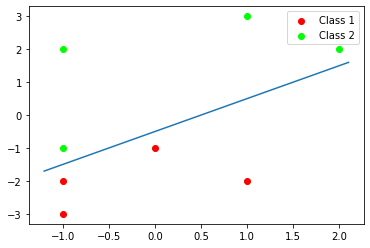

In [ ]:
x1 = np.arange(-1.2, 2.2, 0.1)

plt.scatter(C1.iloc[:, [0]], C1.iloc[:, [1]], label = 'Class 1', color = '#FF0000')
plt.scatter(C2.iloc[:, [0]], C2.iloc[:, [1]], label = 'Class 2', color = '#00FF00')
plt.legend()
  
slope, c = -w[0] / w[1], -b / w[1]
plt.plot(x1, slope * x1 + c)
plt.show()